# Random Walk Algorith

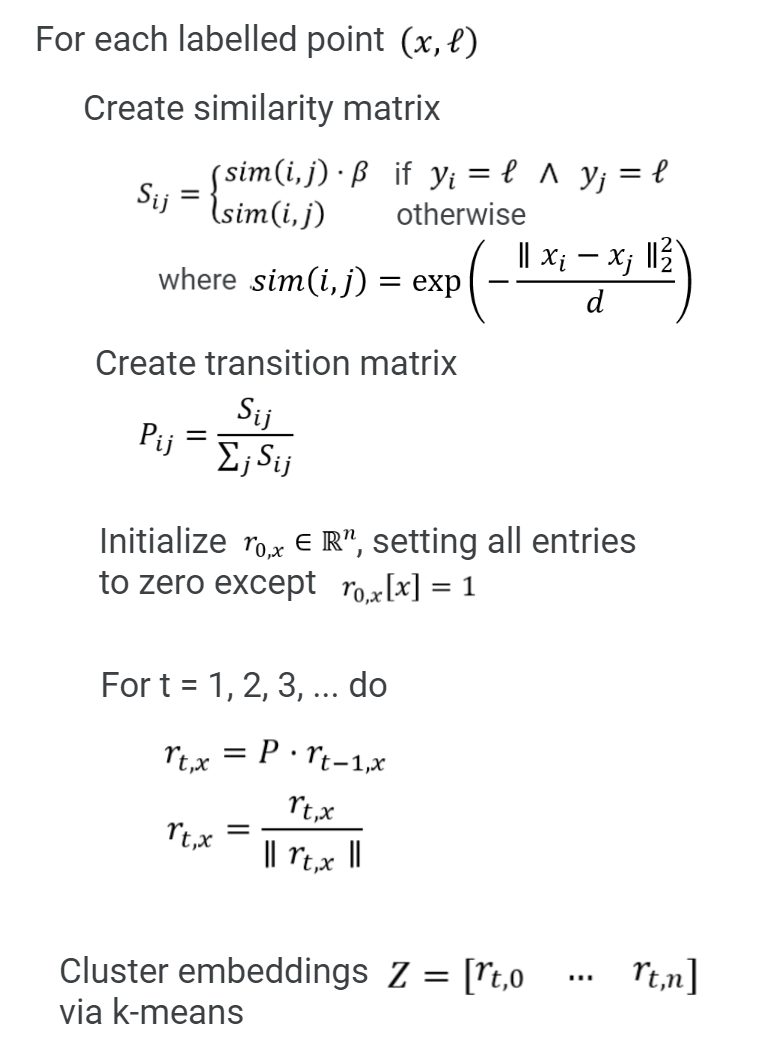

In [1]:
import os, sys

import numpy as np
import pandas as pd

from fastdist import fastdist
from numba import jit
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_moons

project_dir = os.path.abspath("..")
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
    
from app.algorithms import random_walk
from app.data.datasets import SyntheticDataSet
from app.data.noise import compute_corruption_ratio_per_class, apply_noise_to_labels

from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score


import utils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
X, y = make_moons(n_samples=500, noise=0.1)
df_data = pd.DataFrame({ **{ f"feat_{j}": X[:, j] for j in range(X.shape[1]) } })
df_data["true_label"] = y
apply_noise_to_labels(df=df_data, label_noise_proba=0.45)

In [4]:
compute_corruption_ratio_per_class(df=df_data)

,corruption_ratio
true_label,
0,0.456
1,0.412


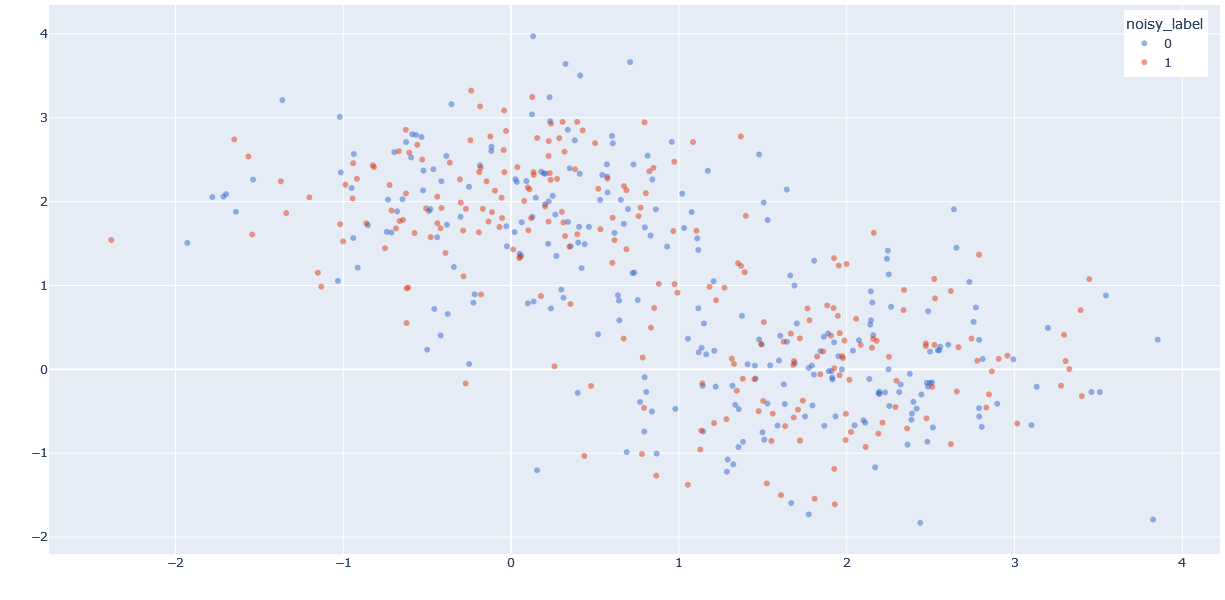

In [35]:
utils.plot_2d(df_data)

In [6]:
y = df_data.noisy_label

print(f"The shape of the generated data matrix is: {X.shape}")

The shape of the generated data matrix is: (500, 2)


In [7]:
print(f"Computing embeddings via random walks.")
embeddings = random_walk.compute_random_walk_embeddings(
    X=X,
    y=y,
    n_steps=1,
    bias_factor=1.0,
    distance_metric="sqeuclidean",
    allow_self_loops=False,
)

Computing embeddings via random walks.
2022-06-16 08:58:52,415 [DEBUG|random_walk ] Computing pairwise distances
2022-06-16 08:58:52,417 [DEBUG|random_walk ] Computing similarity matrix
2022-06-16 08:58:52,421 [DEBUG|random_walk ] Processing class 0
2022-06-16 08:58:53,468 [DEBUG|random_walk ] Processing class 1


In [8]:
n_classes = 10*np.unique(y).shape[0]
print(f"Running k-Means with k={n_classes}")
kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(embeddings)

Running k-Means with k=20


KMeans(n_clusters=20)

In [9]:
df_results = pd.DataFrame({
    "noisy_label": y,
    "true_label": df_data.true_label,
    "cluster_label": kmeans.labels_
})

In [10]:
df_results = utils.assign_labels_based_on_clusters(
    df_results=df_results,
    new_column_name="pred_label"
)

In [11]:
df_data["pred_label"] = df_results["pred_label"]
df_data["cluster_label"] = kmeans.labels_

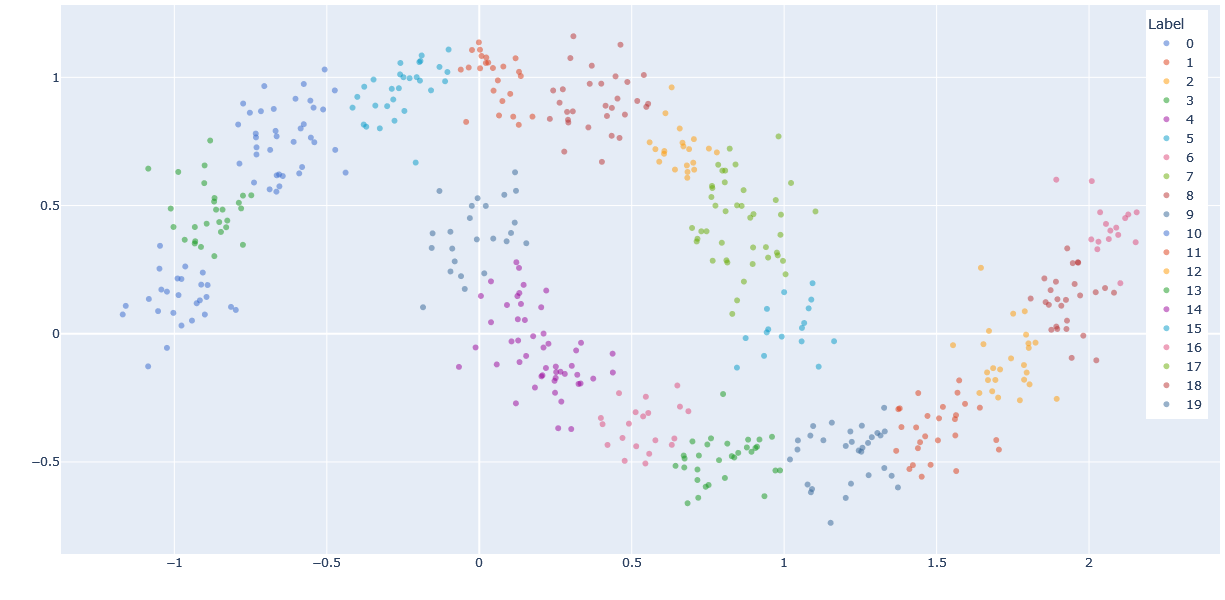

In [12]:
utils.plot_2d(df_data=df_data, color_attr="cluster_label")

In [13]:
data_set = SyntheticDataSet(
    n_dim=2,
    min_distance=2,
    component_size=250,
    variance=0.5,
    label_noise_proba=0.45,
)

In [14]:
df_data = data_set._df.copy()

In [15]:
df_data.shape

(500, 5)

In [16]:
compute_corruption_ratio_per_class(df=df_data)

,corruption_ratio
true_label,
0,0.452
1,0.496


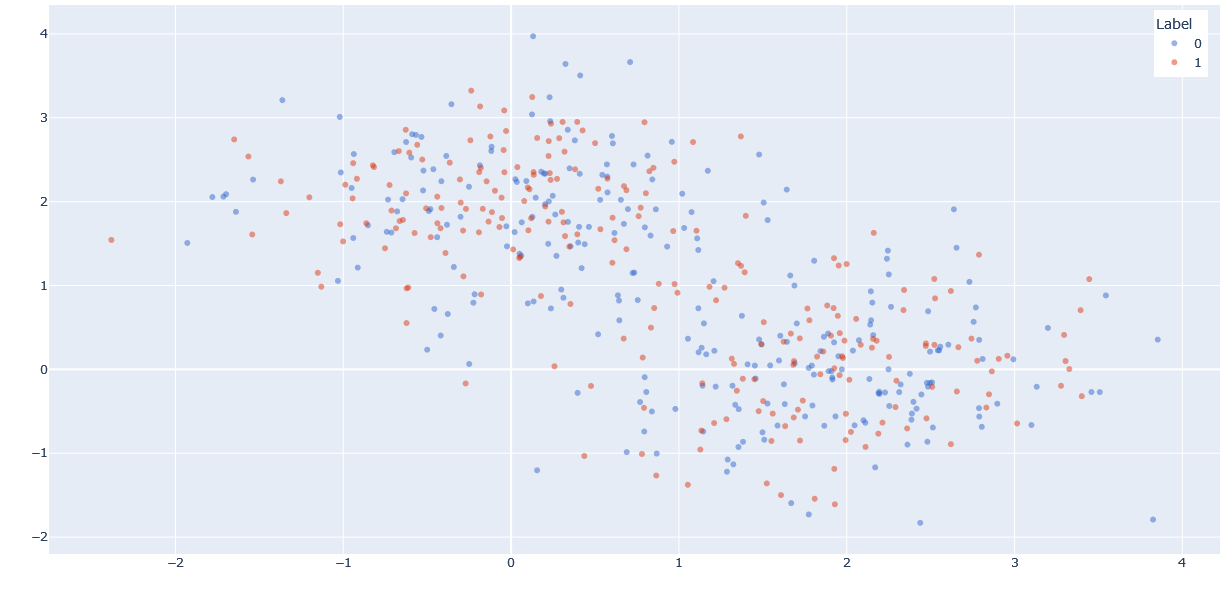

In [17]:
utils.plot_2d(df_data)

In [18]:
X = data_set.features.to_numpy()
y = data_set.labels.to_numpy()

print(f"The shape of the generated data matrix is: {X.shape}")

The shape of the generated data matrix is: (500, 2)


In [26]:
print(f"Computing embeddings via random walks.")
embeddings = random_walk.compute_random_walk_embeddings(
    X=X,
    y=y,
    n_steps=1,
    bias_factor=1,
    distance_metric="sqeuclidean",
    allow_self_loops=False,
)

Computing embeddings via random walks.
2022-06-16 08:59:16,456 [DEBUG|random_walk ] Computing pairwise distances
2022-06-16 08:59:16,458 [DEBUG|random_walk ] Computing similarity matrix
2022-06-16 08:59:16,461 [DEBUG|random_walk ] Processing class 0
2022-06-16 08:59:16,503 [DEBUG|random_walk ] Processing class 1


In [27]:
n_classes = 4*np.unique(y).shape[0]
print(f"Running k-Means with k={n_classes}")
kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(embeddings)

Running k-Means with k=8


KMeans()

In [28]:
df_results = pd.DataFrame({
    "noisy_label": y,
    "true_label": data_set.true_labels,
    "cluster_label": kmeans.labels_
})

In [29]:
df_results = utils.assign_labels_based_on_clusters(
    df_results=df_results,
    new_column_name="pred_label"
)

In [30]:
accuracy_score(y_true=df_results["true_label"], y_pred=df_results["pred_label"])

0.826

In [31]:
df_data["pred_label"] = df_results["pred_label"]
df_data["cluster_label"] = kmeans.labels_

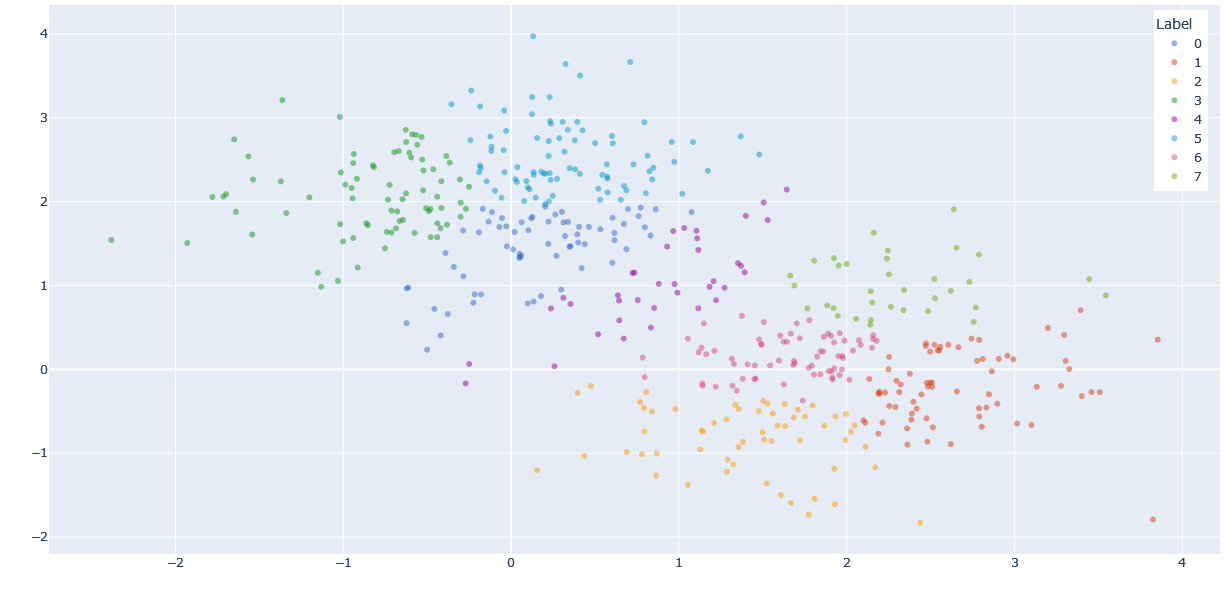

In [32]:
utils.plot_2d(df_data=df_data, color_attr="cluster_label")

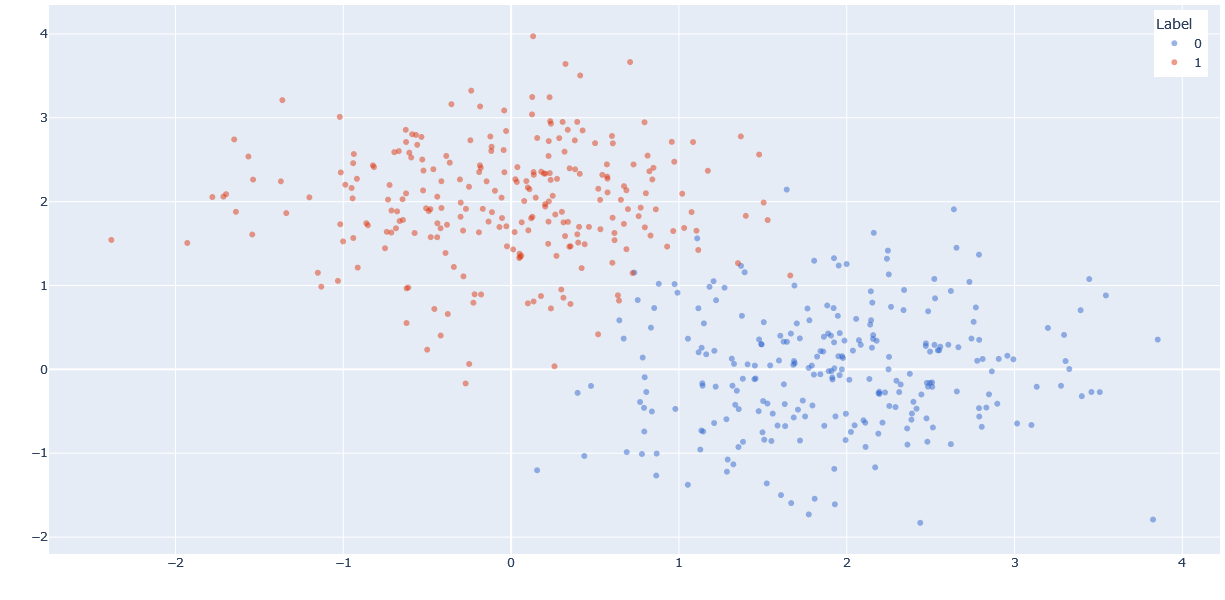

In [34]:
utils.plot_2d(df_data, "true_label")